<a href="https://colab.research.google.com/github/Buraporn-Subsomboon/Buraporn_INFO4670_Spring26/blob/main/Assignment_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Data Quality Check

1.1 Using Python (pandas, matplotlib, or seaborn), load and inspect the Assignment 2 dataset.

In [14]:
# Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Assignment 2 dataset (2).csv')
df.head()

Saving Assignment 2 dataset.csv to Assignment 2 dataset (3).csv


,Column 1,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12-27-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12-20-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12-13-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12-6-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11-29-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Write code to explore the data distribution (e.g., region, type, year) and check whether there is any bias. Provide both the code and your interpretation.

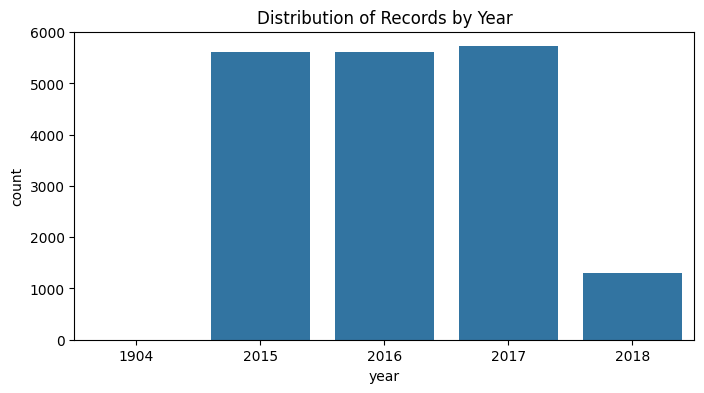

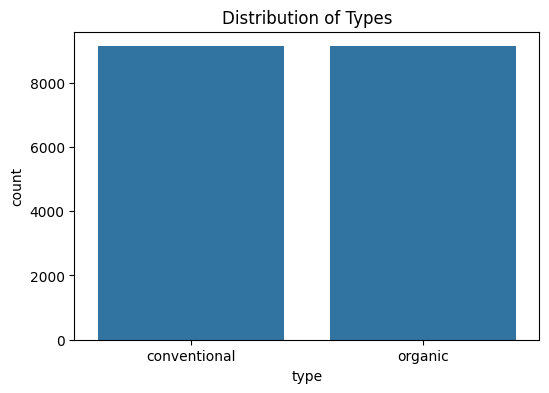

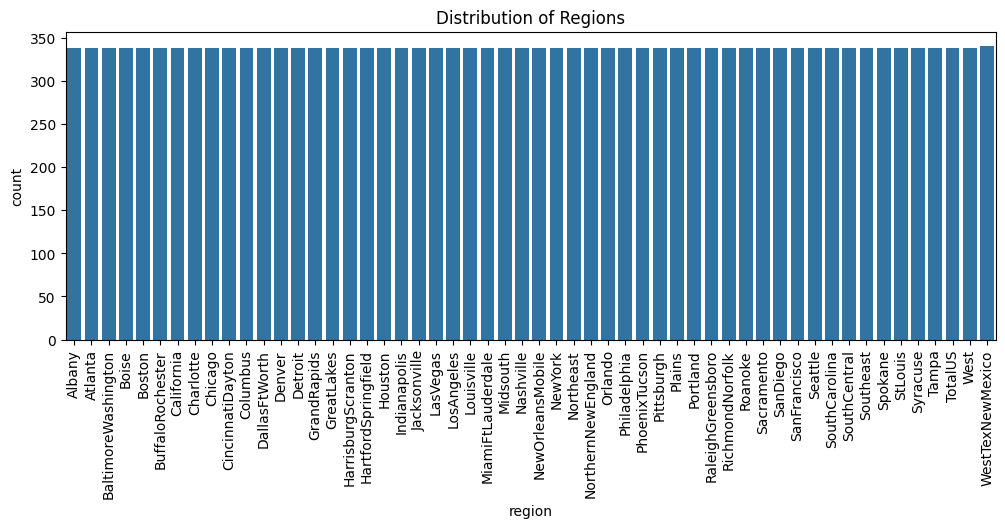

In [15]:
# Write your code here
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='year')
plt.title('Distribution of Records by Year')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type')
plt.title('Distribution of Types')
plt.show()

plt.figure(figsize=(12,4))
sns.countplot(data=df, x='region')
plt.xticks(rotation=90)
plt.title('Distribution of Regions')
plt.show()

1.2 Write Python code to check for duplicate rows and missing values in the dataset. Show the number of duplicates and missing values for each column. Then, explain (in comments or markdown) how you would handle these issues (e.g., drop, impute, or replace).

In [16]:
# Write your code here
num_duplicates = df.duplicated().sum()
print(f"Total of Duplicate Rows: {num_duplicates}")

missing_values = df.isnull().sum()
print("\nMissing Values for Each Column:")
print(missing_values)

Total of Duplicate Rows: 2

Missing Values for Each Column:
Column 1        0
Date            0
AveragePrice    0
Total Volume    1
4046            2
4225            1
4770            1
Total Bags      1
Small Bags      2
Large Bags      2
XLarge Bags     1
type            1
year            0
region          0
dtype: int64


1.3 Use Python code to print the number of rows and columns in the dataset (e.g., with df.shape). Based on the dataset size, explain (briefly) whether you think the dataset is sufficient for training a machine learning model.

In [17]:
# Write your code here
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")


The dataset has 18254 rows and 14 columns.


#2. Data Cleaning and Preprocessing

2.1 Remove the first column or “Column 1” from the dataset. Treat the ‘year’ variable as nominal.

In [18]:
# Write your code here
df.drop(columns=['Column 1'], inplace=True, errors='ignore')
df['year'] = df['year'].astype('category')

print("Remaining columns:", df.columns.tolist())
print("Year data type:", df['year'].dtype)

Remaining columns: ['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']
Year data type: category


2.2 Check for duplicate values and remove them.

In [20]:
# Write your code here
df.drop_duplicates(inplace=True)
print(f"Total of Duplicate Rows after removal: {df.duplicated().sum()}")
print(f"After duplicate removal: {df.shape}")

Total of Duplicate Rows after removal: 0
After duplicate removal: (18252, 13)


2.3 Check for missing values. If a data record (row) only has a few missing values, replace the missing values with the median of the column feature in that specific “Region” variable. If most column values in a data record are missing, remove the data record.

In [21]:
# Write your code here
threshold = len(df.columns) * 0.75
df.dropna(thresh=threshold, inplace=True)

numeric_columns = df.select_dtypes(include=['number']).columns
for column in numeric_columns:
  df[column] = df.groupby('region')[column].transform(lambda x: x.fillna(x.median()))

print("Missing value after cleaning:")
print(df.isnull().sum())

Missing value after cleaning:
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


2.4 Find the correlation between the variables and describe how the correlated values among the variables impact the model accuracy.


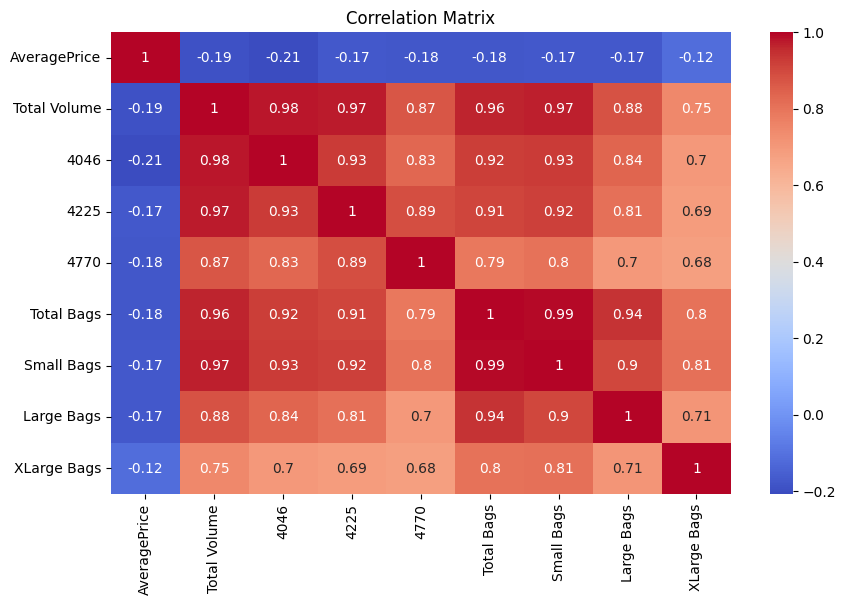

In [22]:
# Write your code here
coor = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(coor, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#3. Exploratory Data Analysis (EDA)


3.1 Describe the variables
- Describe all variables in the dataset.
- For continuous variables: report **range (min, max), mean, median, and distribution**.
- For categorical variables: list unique values.

In [23]:
# Write your code here
print(df.describe())

print("Years:", df['year'].unique())
print("Regions:", df['region'].unique())
print("Types:", df['type'].unique())

       AveragePrice  Total Volume          4046          4225          4770  \
count  18251.000000  1.825100e+04  1.825100e+04  1.825100e+04  1.825100e+04   
mean       1.406020  8.505523e+05  2.929840e+05  2.951225e+05  2.283727e+04   
std        0.402675  3.453367e+06  1.264922e+06  1.204058e+06  1.074584e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.084067e+04  8.543500e+02  3.008325e+03  0.000000e+00   
50%        1.370000  1.073542e+05  8.645300e+03  2.905673e+04  1.849900e+02   
75%        1.660000  4.329430e+05  1.110375e+05  1.501258e+05  6.240690e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags  
count  1.825100e+04  1.825100e+04  1.825100e+04   18251.000000  
mean   2.396140e+05  1.821784e+05  5.433233e+04    3106.086096  
std    9.861913e+05  7.461393e+05  2.439532e+05   17691.955036  
min    0.000000e+00  0.00000

3.2 Inspect the earliest recorded date
- Find the earliest `Date`.
- Check if there are avocado prices recorded from the earliest date up to 2010.
- Comment: does the earliest data point look reasonable? Keep or remove?

In [24]:
# Write your code here
df['Date'] = pd.to_datetime(df['Date'])
print("Earliest Date:", df['Date'].min())
print("Before 2010:", df[df['Date'] <  '2010-01-01'].shape[0])

Earliest Date: 1904-01-21 00:00:00
Before 2010: 1


3.3 Highest average price
- Find the highest value in "AveragePrice".
- Report which region it belongs to.
- Describe how you obtained the result.

In [25]:
# Write your code here
max_price = df['AveragePrice'].max()

df[df['AveragePrice'] == max_price][
    ['region','AveragePrice','Date']
]

,region,AveragePrice,Date
14125,SanFrancisco,3.25,2016-10-30


3.4 Highest total volume
- Find the highest total volume of avocados.
- Report which region it belongs to.
- Describe how you obtained the result.

In [26]:
# Write your code here
max_volume = df['Total Volume'].max()

df[df['Total Volume'] == max_volume][
    ['region','Total Volume','Date']
]

,region,Total Volume,Date
9097,TotalUS,62505646.52,2018-02-04
